### Problem Statement
An aviation company that provides domestic as well as international trips to the customers now wants to apply atargeted approach instead of reaching out to each of the customers. This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the userpage of the targeted customerswho have a high propensity to take up the product.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Project Notes - 1

### **Read the Dataset**

In [2]:
dataset_url = 'Social Media Data for DSBA.csv'

social_media_data = pd.read_csv(dataset_url)

In [3]:
social_media_data.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [4]:
social_media_data.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0.0,14.0


### Rename the column names as per the data dictionary for ease of understanding

In [5]:
social_media_data.rename(columns = {'Taken_product':'Buy_ticket'}, inplace = True)

## **2. Data Report**

### **Check the number of rows (observations) and the number of columns (variables)**

In [6]:
print('The number of rows (observations) is',social_media_data.shape[0],'\n''The number of columns (variables) is',social_media_data.shape[1])

The number of rows (observations) is 11760 
The number of columns (variables) is 17


### **Check the Data Type of the Variables**

In [7]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Buy_ticket                                    11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

### **Check the basic measures of descriptive statistics for the continuous variables**

In [8]:
social_media_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866088e+01,48.660793,4.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712755e+00,1.082909,1.0,2.00,3.0,4.00,10.0
Adult_flag,11759.0,7.939451e-01,0.851828,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11759.0,1.381776e+01,9.070974,0.0,8.00,12.0,18.00,270.0


## **3. Exploratory Data Analysis**

### **Check for different types of data in the columns**

**Removal of unwanted variables (If needed)**

In [9]:
social_media_data['Buy_ticket'].value_counts()

No     9864
Yes    1896
Name: Buy_ticket, dtype: int64

In [10]:
social_media_data['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

Here, all the records except for `Laptop` will be grouped together under `Mobile`.

In [11]:
social_media_data['preferred_device'].mask(social_media_data['preferred_device'] != "Laptop", "Mobile", inplace=True)

In [12]:
social_media_data['preferred_device'].value_counts()

Mobile    10652
Laptop     1108
Name: preferred_device, dtype: int64

In [13]:
social_media_data['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [14]:
# Grouping Variables like `Game`, `OTT`, `Social media` and `Movile` under `Entertainment` makes sense here.

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Game", "Entertainment", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Movie", "Entertainment", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "OTT", "Entertainment", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Social media", "Entertainment", inplace=True)

In [15]:
# Grouping variables like `Tour  Travel` and `Tour and Travel` under `Others` makes sense here. 
# As tour and travel does not generally point towards anything particular.

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Tour  Travel", "Other", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Tour and Travel", "Other", inplace=True)

In [16]:
# Variables like `Trekking` and `Hill Stations` are not similar to some extent.
# As, `Hill Stations` make up only 108 records, I will be putting it under `Trekking` to avoid any hassle.

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Hill Stations", "Trekking", inplace=True)

In [17]:
# lastly, `Big Cities` can be anywhere and can be also easily belong to category like `Medical`, `Financial` or even `Entertainment`
# to avoid this, I will group it under `Other`

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Big Cities", "Other", inplace=True)

In [18]:
social_media_data['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other              1386
Entertainment      1173
Trekking            636
Name: preferred_location_type, dtype: int64

In [19]:
social_media_data['Adult_flag'].value_counts()

0.0    5047
1.0    4768
2.0    1264
3.0     680
Name: Adult_flag, dtype: int64

The name of the variable `Adult_flag` leads to some misconception, as it clearly depicts the number of adults,
I will be renaming the column name to `number_of_adults`.

In [20]:
social_media_data.rename(columns = {'Adult_flag':'number_of_adults'}, inplace = True)

In [21]:
social_media_data['number_of_adults'].value_counts()

0.0    5047
1.0    4768
2.0    1264
3.0     680
Name: number_of_adults, dtype: int64

In [22]:
social_media_data['following_company_page'].value_counts()

No      8355
Yes     3284
1         12
0          5
Yeso       1
Name: following_company_page, dtype: int64

`following_company_page` has different values for Boolean, No, Yes, 1 and 0.

For the dataset, I will assume 1 as `Yes` and 0 as `No`

In [23]:
social_media_data['following_company_page'].mask(social_media_data['following_company_page'] == "1", "Yes", inplace=True)

In [24]:
social_media_data['following_company_page'].mask(social_media_data['following_company_page'] == "0", "No", inplace=True)

In [25]:
social_media_data['following_company_page'].value_counts()

No      8360
Yes     3296
Yeso       1
Name: following_company_page, dtype: int64

In [26]:
social_media_data['working_flag'].value_counts()

No     9951
Yes    1808
0         1
Name: working_flag, dtype: int64

In [27]:
# member_in_family contains few rows where '3' is represented as 'Three'.
# Replacing them.

social_media_data['member_in_family'].mask(social_media_data['member_in_family'] == "Three", "3", inplace=True)

### **Check the Data Type of the Variables**

In [28]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Buy_ticket                                    11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11760 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

### **Check the basic measures of descriptive statistics for the continuous variables**

In [29]:
social_media_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866088e+01,48.660793,4.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712755e+00,1.082909,1.0,2.00,3.0,4.00,10.0
number_of_adults,11759.0,7.939451e-01,0.851828,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11759.0,1.381776e+01,9.070974,0.0,8.00,12.0,18.00,270.0


In [30]:
import pandas_profiling as pdp

In [31]:
eda_profile_social_media_data = pdp.ProfileReport(social_media_data)

In [32]:
# Since the HTML report is already generated, Commenting out the below code to save execution time.

# eda_profile_social_media_data.to_file("eda_profile_social_media_data.html")

#### Missing Value treatment

From the EDA report generated, it can be noted that

* `Yearly_avg_view_on_travel_page` has **581 (4.9%)** missing values
* `total_likes_on_outstation_checkin_given` has **381 (3.2%)** missing values
* `Yearly_avg_comment_on_travel_page` has **206 (1.8%)** missing values
* `yearly_avg_Outstation_checkins` has **75 (0.6%)** missing values
* `preferred_location_type` has **31 (0.3%)** missing values
* `following_company_page` has **103 (0.9%)** missing values

In [33]:
social_media_data.isnull().sum()

UserID                                            0
Buy_ticket                                        0
Yearly_avg_view_on_travel_page                  581
preferred_device                                  0
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
number_of_adults                                  1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [34]:
# Dropping the null values from these columns, as they have less than 1% of the null values 
# `yearly_avg_Outstation_checkins`, `preferred_location_type`, `following_company_page`

# social_media_data.dropna(subset=['following_company_page', 'preferred_location_type', 'yearly_avg_Outstation_checkins'], inplace=True)

In [35]:
# Imputing the remaining null values.
# Using the SimpleImputer and ColumnTransformer to apply different strategy to different columns

# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

In [36]:
# impute_most_frequent = SimpleImputer(strategy='most_frequent')
# impute_mean = SimpleImputer(strategy='mean')

# column_trans = ColumnTransformer([('impute_Yearly_avg_view_on_travel_page', impute_most_frequent, [2]),
#                                  ('impute_Yearly_avg_comment_on_travel_page', impute_most_frequent, [8]),
#                                  ('impute_total_likes_on_outstation_checkin_given', impute_mean, [4])], 
#                                  remainder='passthrough')

In [37]:
# column_names = social_media_data.columns
# imputed_social_media_data = column_trans.fit_transform(social_media_data)

In [38]:
# social_media_data = pd.DataFrame(imputed_social_media_data, columns = column_names).reset_index(drop='index')

#### Since the total number of null value rows are 1263 which only makes upto 10% of the data, we can safely drop the rows.

In [39]:
social_media_data_null_drop = social_media_data.dropna()

In [40]:
social_media_data_null_drop.isnull().sum()

UserID                                          0
Buy_ticket                                      0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
number_of_adults                                0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

### Outliers

In [41]:
# construct box plot for continuous variables
cont = social_media_data_null_drop.dtypes[(social_media_data_null_drop.dtypes != 'object')].index

In [42]:
def outliers_continuous(column, nbins):
    fig_dims = (20, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=fig_dims)
    sns.boxplot(x= column, data=social_media_data_null_drop)

In [43]:
cont = cont.drop(cont[0]) # Drop the userId
cont = cont.drop(cont[7]) # Drop the number of adults

In [44]:
cont

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page', 'travelling_network_rating',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

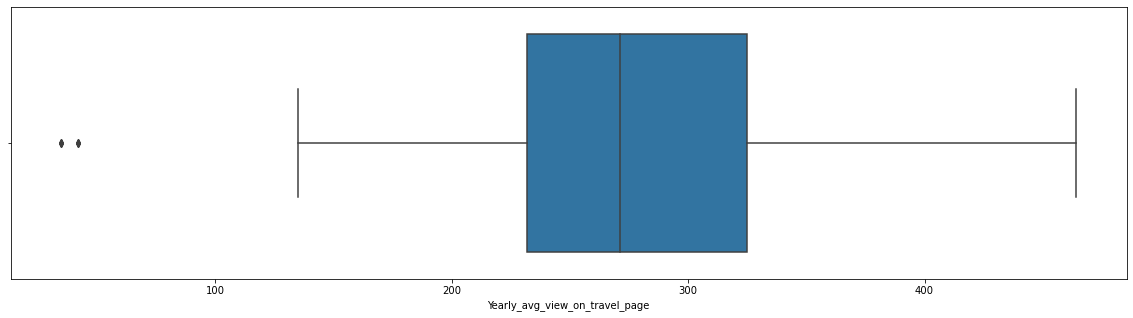

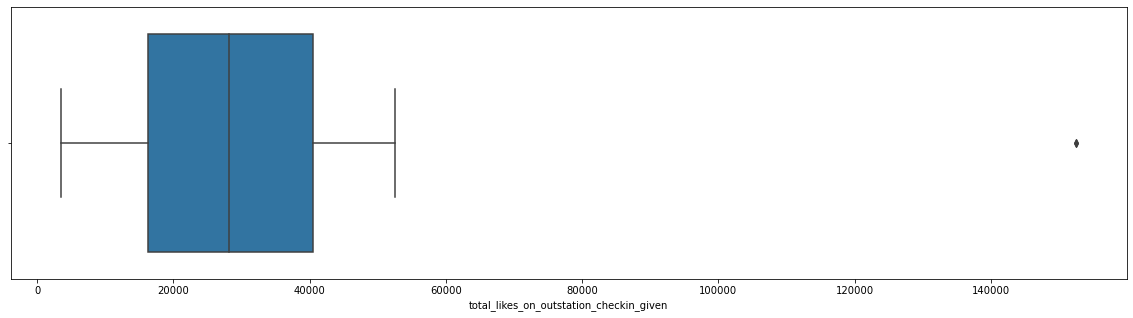

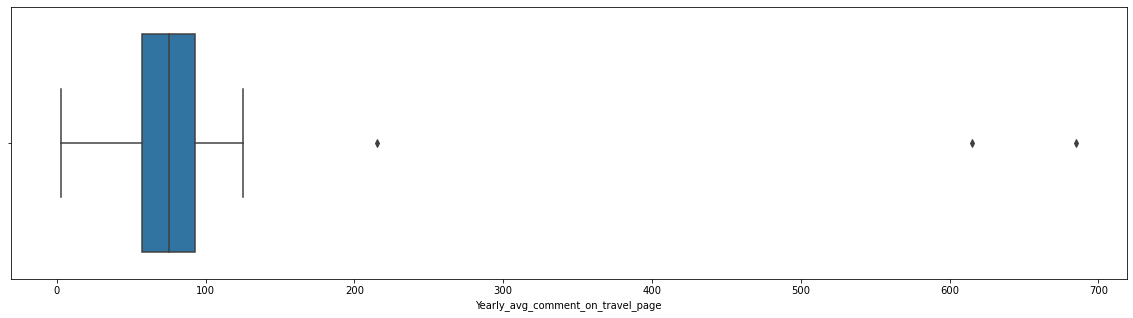

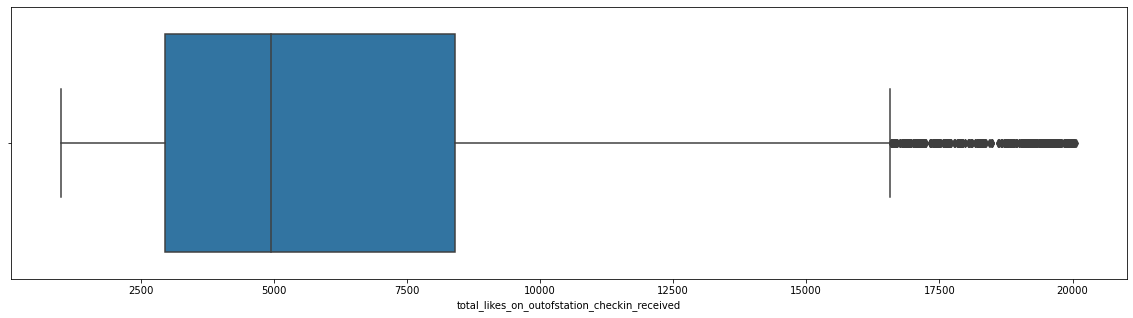

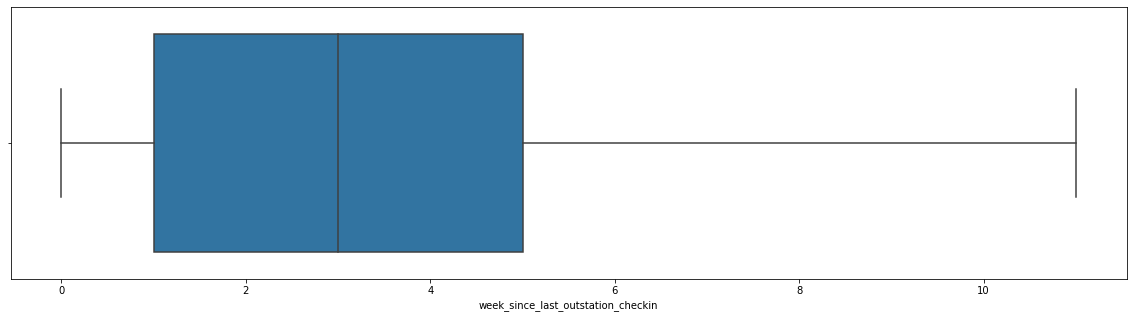

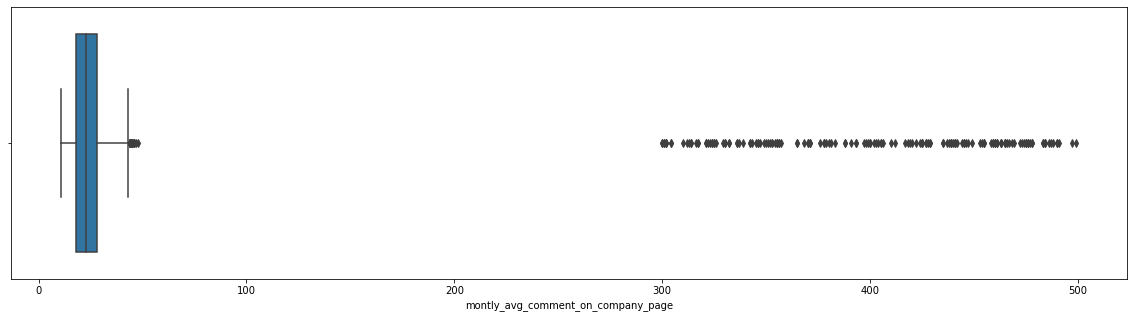

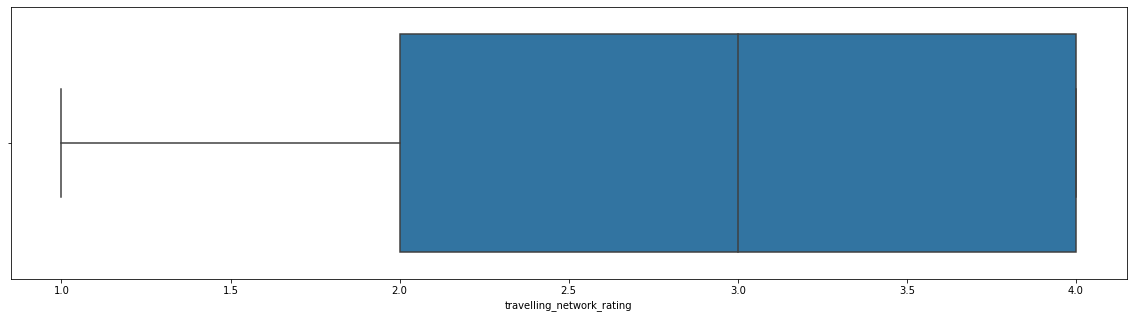

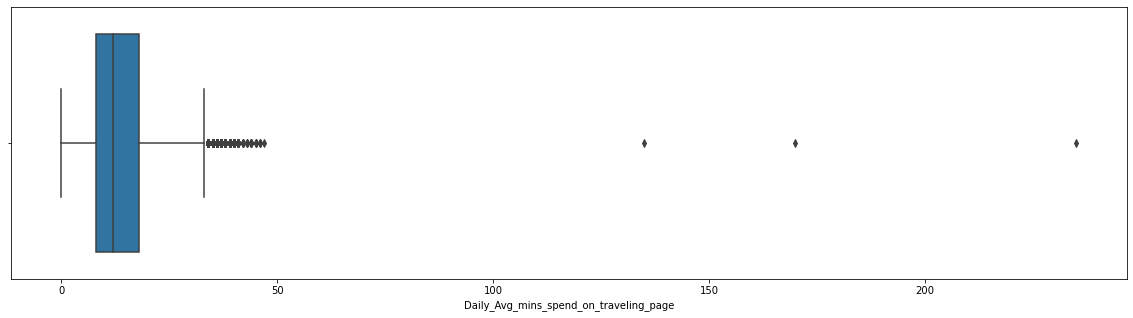

In [45]:
%matplotlib inline

for column in cont:
    outliers_continuous(column, 20)

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
for column in social_media_data_null_drop[cont].columns:
    lr,ur=remove_outlier(social_media_data_null_drop[column])
    social_media_data_null_drop[column]=np.where(social_media_data_null_drop[column]>ur,ur,social_media_data_null_drop[column])
    social_media_data_null_drop[column]=np.where(social_media_data_null_drop[column]<lr,lr,social_media_data_null_drop[column])

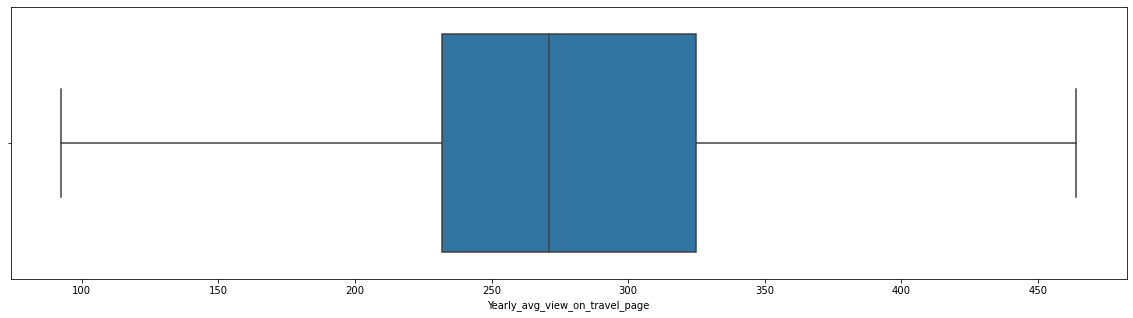

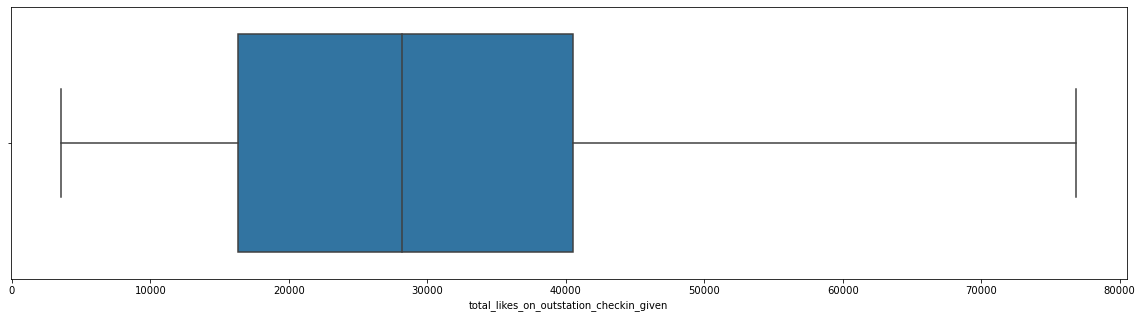

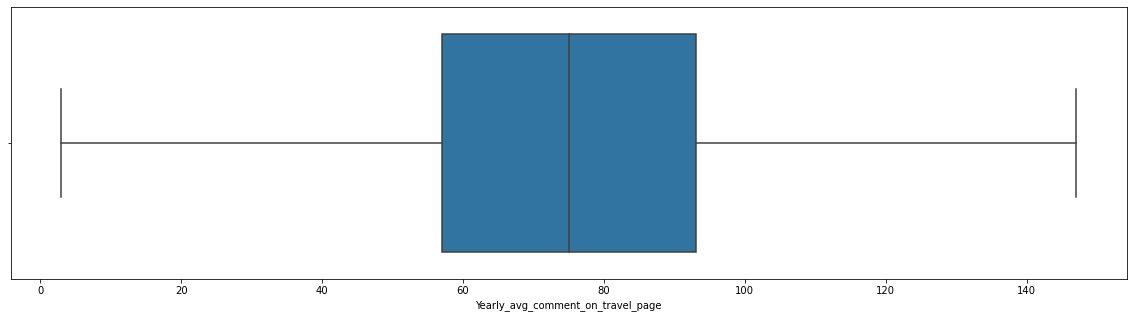

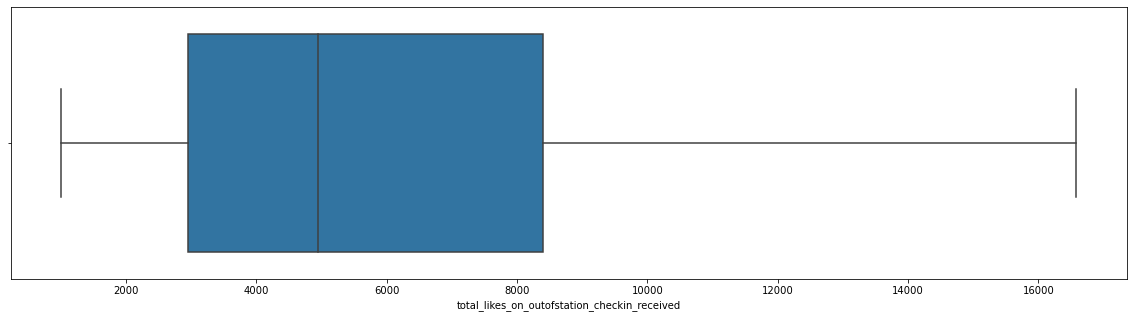

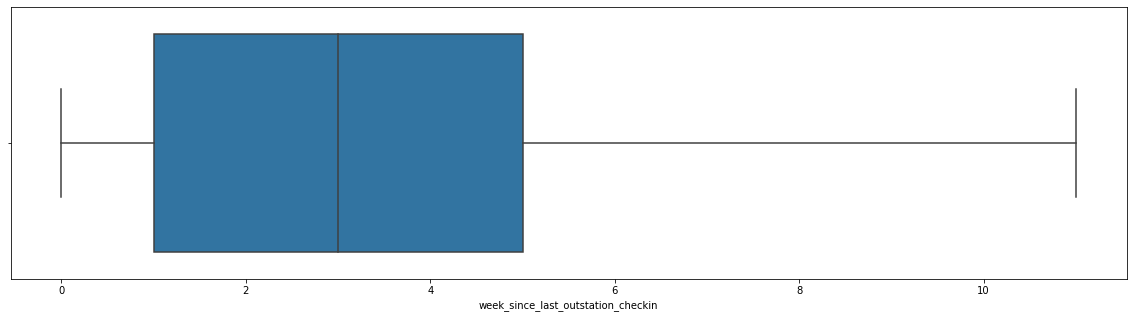

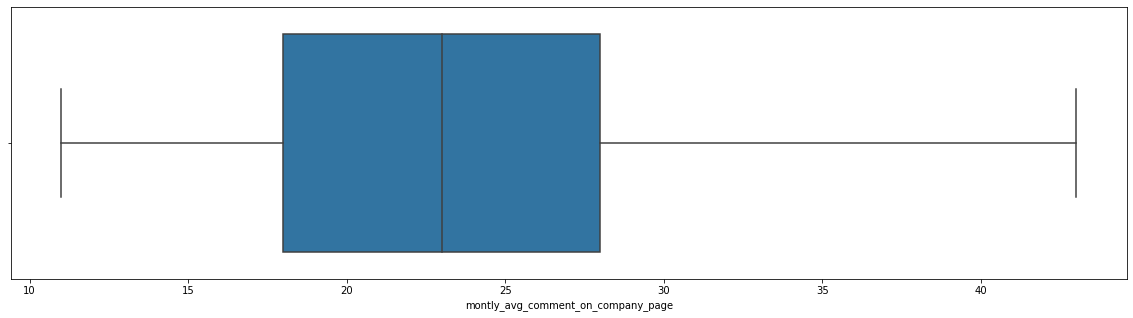

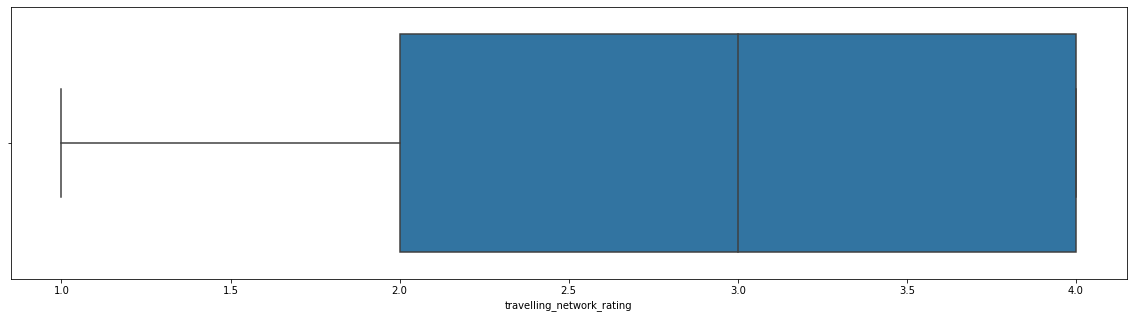

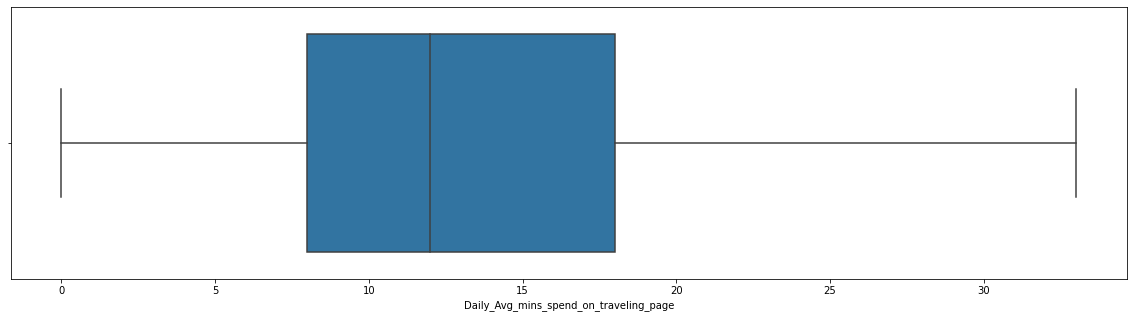

In [48]:
for column in cont:
    outliers_continuous(column, 20)

In [49]:
social_media_data_null_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10496 non-null  int64  
 1   Buy_ticket                                    10496 non-null  object 
 2   Yearly_avg_view_on_travel_page                10496 non-null  float64
 3   preferred_device                              10496 non-null  object 
 4   total_likes_on_outstation_checkin_given       10496 non-null  float64
 5   yearly_avg_Outstation_checkins                10496 non-null  object 
 6   member_in_family                              10496 non-null  object 
 7   preferred_location_type                       10496 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10496 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10496 non-null 

Here **yearly_avg_Outstation_checkins** and  **member_in_family** are clearly numeric, but it is being displayed as object.
Converting them to numerical based on below observations.

In [50]:
social_media_data_null_drop['yearly_avg_Outstation_checkins'].value_counts()

1     3794
2      844
10     617
9      340
7      336
3      336
8      320
5      261
4      256
6      236
16     231
11     213
24     201
15     189
23     189
18     186
29     184
26     172
20     172
25     172
28     160
14     154
19     150
17     147
12     143
13     137
22     133
21     133
27      89
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

There is a row where the value is **'*'**. I will be dropping this row

In [51]:
# get names of indexes for which
# column yearly_avg_Outstation_checkins has value *

index_names = social_media_data_null_drop[ social_media_data_null_drop['yearly_avg_Outstation_checkins'] == '*' ].index

In [52]:
social_media_data_null_drop.drop(index_names, inplace = True)

In [53]:

social_media_data_null_drop['yearly_avg_Outstation_checkins'] = social_media_data_null_drop['yearly_avg_Outstation_checkins'].astype(object).astype(int)

In [54]:
social_media_data_null_drop['member_in_family'] = social_media_data_null_drop['member_in_family'].astype(object).astype(int)

In [55]:
social_media_data_null_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10495 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10495 non-null  int64  
 1   Buy_ticket                                    10495 non-null  object 
 2   Yearly_avg_view_on_travel_page                10495 non-null  float64
 3   preferred_device                              10495 non-null  object 
 4   total_likes_on_outstation_checkin_given       10495 non-null  float64
 5   yearly_avg_Outstation_checkins                10495 non-null  int32  
 6   member_in_family                              10495 non-null  int32  
 7   preferred_location_type                       10495 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10495 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10495 non-null 

In [56]:
# Since the HTML report is already generated, Commenting out the below code to save execution time.
eda_profile_social_media_data_post_cleaning = pdp.ProfileReport(social_media_data_null_drop)
eda_profile_social_media_data_post_cleaning.to_file("eda_profile_social_media_data_post_cleaning.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
social_media_data_null_drop['number_of_adults'].value_counts()

0.0    4496
1.0    4265
2.0    1115
3.0     619
Name: number_of_adults, dtype: int64

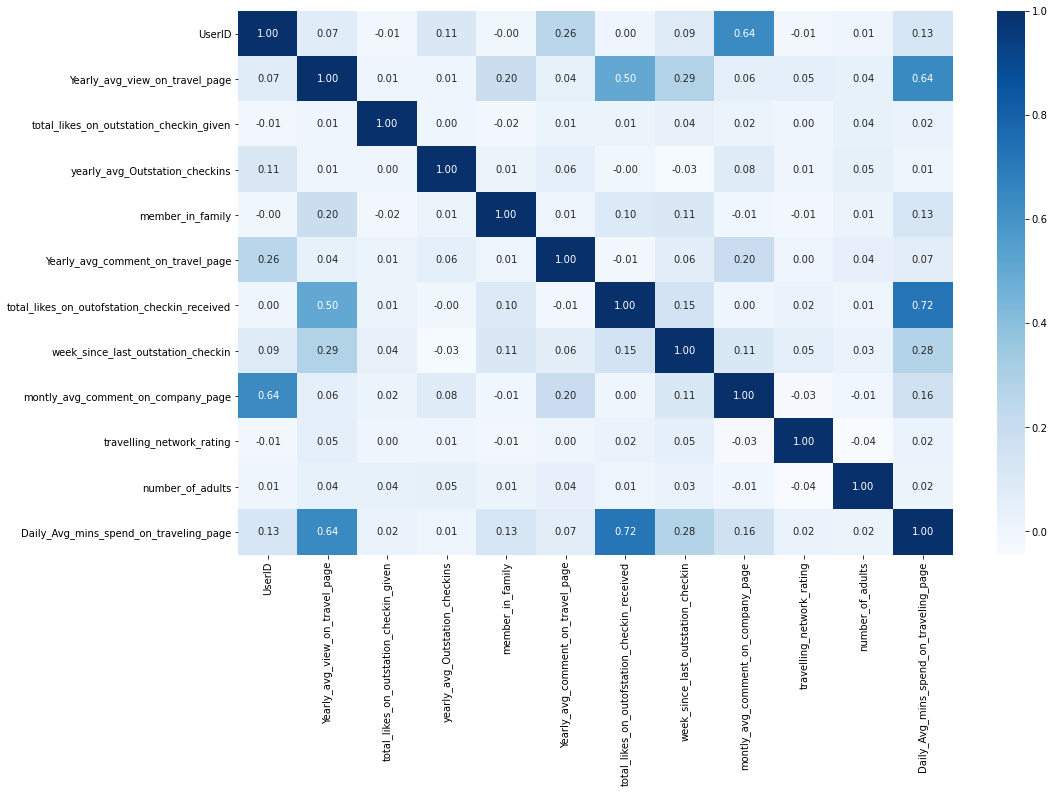

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(social_media_data_null_drop.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [59]:
social_media_data_null_drop.to_csv('social_media_data_eda.csv')


**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Project Notes - 2

In [67]:
dataset_url = 'social_media_data_eda.csv'

social_media_data = pd.read_csv(dataset_url)

In [68]:
social_media_data.head()

,Unnamed: 0,UserID,Buy_ticket,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,number_of_adults,Daily_Avg_mins_spend_on_traveling_page
0,0,1000001,Yes,307.0,Mobile,38570.0,1,2,Financial,94.0,5993.0,8.0,Yes,11.0,No,1.0,0.0,8.0
1,1,1000002,No,367.0,Mobile,9765.0,1,1,Financial,61.0,5130.0,1.0,No,23.0,Yes,4.0,1.0,10.0
2,2,1000003,Yes,277.0,Mobile,48055.0,1,2,Other,92.0,2090.0,6.0,Yes,15.0,No,2.0,0.0,7.0
3,3,1000004,No,247.0,Mobile,48720.0,1,4,Financial,56.0,2909.0,1.0,Yes,11.0,No,3.0,0.0,8.0
4,4,1000005,No,202.0,Mobile,20685.0,1,1,Medical,40.0,3468.0,9.0,No,12.0,No,4.0,1.0,6.0


In [69]:
# Drop Unnamed: 0 column
social_media_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [70]:
social_media_data.head()

,UserID,Buy_ticket,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,number_of_adults,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,Mobile,38570.0,1,2,Financial,94.0,5993.0,8.0,Yes,11.0,No,1.0,0.0,8.0
1,1000002,No,367.0,Mobile,9765.0,1,1,Financial,61.0,5130.0,1.0,No,23.0,Yes,4.0,1.0,10.0
2,1000003,Yes,277.0,Mobile,48055.0,1,2,Other,92.0,2090.0,6.0,Yes,15.0,No,2.0,0.0,7.0
3,1000004,No,247.0,Mobile,48720.0,1,4,Financial,56.0,2909.0,1.0,Yes,11.0,No,3.0,0.0,8.0
4,1000005,No,202.0,Mobile,20685.0,1,1,Medical,40.0,3468.0,9.0,No,12.0,No,4.0,1.0,6.0
